<a href="https://colab.research.google.com/github/slowvak/AI-Deep-Learning-Lab/blob/master/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we need to get our data. This is a public data set on diabetes in Pima Indians.

In [1]:
!wget -O diabetes.csv "https://www.dropbox.com/s/19pisdoog2pmw3h/pima-indians-diabetes.csv?dl=0"


--2023-01-17 14:02:21--  https://www.dropbox.com/s/19pisdoog2pmw3h/pima-indians-diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/19pisdoog2pmw3h/pima-indians-diabetes.csv [following]
--2023-01-17 14:02:22--  https://www.dropbox.com/s/raw/19pisdoog2pmw3h/pima-indians-diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd04ff01d032ab869892c941093.dl.dropboxusercontent.com/cd/0/inline/B0tZn2iELOPvBozLqHqQ2DAlJu39ezu4a2gxn6BMY1--OUYBvNkIQrP42bo2Xg7QPMiXZxuZ_9IdT8fnqF6aN73u0idWbbybzgnQe4c7DyAzMKkkT1hL8O7hS_eiWirIWasBWDtORHV7mw7HxsooLHfjTs2N2E8VFA2KC4WyiO4G7w/file# [following]
--2023-01-17 14:02:22--  https://ucd04ff01d032ab869892c941093.dl.dropboxusercontent.com/cd/0/inline/B0tZn2iELOPvBozLqHqQ2DAlJu39ezu4a2gx

In [2]:
import pandas as pd
import numpy as np

Now we ***import*** two libraries that provide important data handling capabilities--first being **pandas**, which will read in a CSV (Comma Separated Values) file and use it to fill a **dataframe**. The file also has a first row which describes the data in each column. Pandas is 'smart' enough to recognize this. **Numpy** is a library for numerical computations on arrays.
  The 'as' part of the import command allows us to use our own name for any module that we import. 'pd' and 'np' are very common abbreviations used for pandas and numpy.

**Interesting Side Note: **  Numpy was written by former Mayo Graduate Student Travis Oliphant. https://en.wikipedia.org/wiki/Travis_Oliphant

In [7]:
data = pd.read_csv("diabetes.csv")
# print out the first few lines to make sure we got the data and that it looks reasonable

data


,NumPregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The last line here--'data'--is what prineted out the first few and the last few lines in the pandas dataframe called 'data'. This is a unique jupyter notebook function--if you just have a variable name, it will print it out. But it only is the last variable.  Remember up above you defined the variable 'a'? Add 'a' to line 5 and run the cell again. Now the data dataframe will not be printed, and instead, '10' will be printed since that is the value of a. This will not work in 'true' Python code.


Next we import modules for visualizing data and making plots. 
Here will do a quick plot to see the correlation coefficients of the various features in the data. 

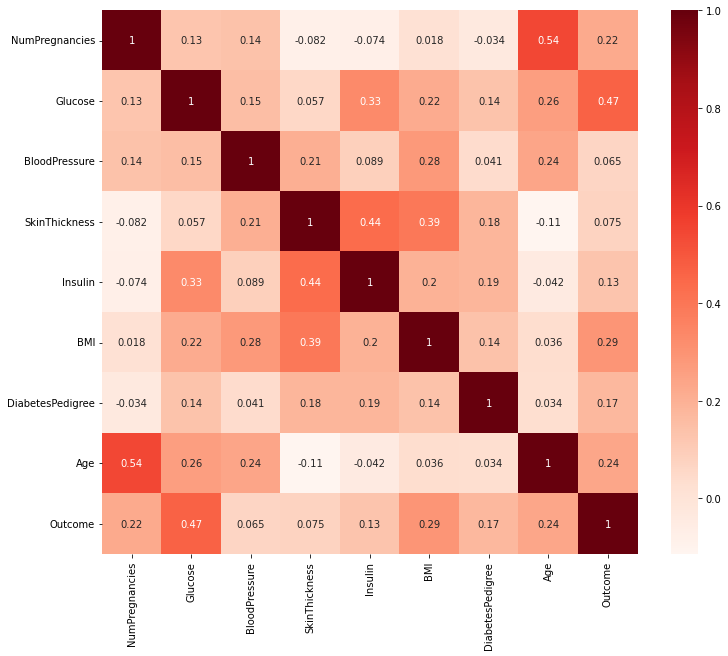

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Lets look at how much the various features are correlated using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

To do machine learning, we must convert the dataframe into a set of feature vectors (usually called 'X') and the class or label which we will call 'y', which in our case is 1-diabetic 0-not diabetic.


In [19]:
array = data.values
X = array[:,0:8]
y = array[:,8]

#print out the shape of the X feature array--number of features and number of rows/examples
X.shape

(768, 8)

Note it also has 768 rows (note this is rows/cols not x,y). But there is 1 less column. Why is there 1 less and how did that happen?


Now with our data organized, we can try training a classifier. We will start with that to show the impact of feature selection. We will use a Rdige Classifier, which is essentially a linar regression and the regression lines splits the classes.  I include code for a support vector machine (SVM) which is a popular traditional machine learning method that is much more powerful. We also need to split data into a set used to train the SVM, and a hold-out set to see how well it worked (the 'test' set). 

sklearn is a very comprehence library of machine learning algorithms. (https://scikit-learn.org/stable/)  There are other scikit libraries such as for image manipulation, statistics, engineering, etc. SciPy.org is the host site.


In [20]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn import svm

# define a function that will train a classifier and then measure performance

def train_and_measure_performance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test
    #Create a ridge Classifier
    clf = RidgeClassifier()
#    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy: how often is the classifier correct?
    return (metrics.accuracy_score(y_test, y_pred))

baseline_performance = train_and_measure_performance(X, y)
print (f'Baseline accuracy with all features is {baseline_performance}')

Baseline accuracy with all features is 0.7359307359307359


Now we will use sklearn feature selection methods. We will start with filter method--Chi Square

In [21]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

# Feature extraction--select the 4 best features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)
feature_names = data.columns[0:8]

for i, feature in enumerate (feature_names):
    print (f'{fit.scores_[i]}, {feature}') 
#print (feature_names)
#print(fit.scores_)



87.43079122224427, NumPregnancies
895.4803367623492, Glucose
7.70006972896644, BloodPressure
10.28703358882846, SkinThickness
1138.1827439428018, Insulin
77.17341015708607, BMI
4.168845212891903, DiabetesPedigree
154.1812563953612, Age
Index(['NumPregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')
[  87.431  895.48     7.7     10.287 1138.183   77.173    4.169  154.181]


So this means that ranked feature importance is: Insulin, Glucose, Age, BMI, Pregnancies, Skin thickness, BP, Pedigree

But you have to look fairly closely to figure out the order. Can the computer do that for us?  There is a python function called 'sorted' which returns a sorted list of the items in the list. 

In [22]:
sorted_scores = sorted(fit.scores_)
print (sorted_scores)


[4.168845212891903, 7.70006972896644, 10.28703358882846, 77.17341015708607, 87.43079122224427, 154.1812563953612, 895.4803367623492, 1138.1827439428018]


OK--that sorted the list of values, but we need to re-arrange the feature names to match those. In order to do that, we 'zip' the two lists together, then sort, and then print them out.

In [23]:
zipped_lists = zip(fit.scores_, feature_names)
sorted_pairs = sorted(zipped_lists)
for f, val in sorted_pairs:
    print (f'{f} - {val}')

4.168845212891903 - DiabetesPedigree
7.70006972896644 - BloodPressure
10.28703358882846 - SkinThickness
77.17341015708607 - BMI
87.43079122224427 - NumPregnancies
154.1812563953612 - Age
895.4803367623492 - Glucose
1138.1827439428018 - Insulin


That looks pretty good, except maybe we want 'style points'. See if you can figure out how to reverse the order so the most important is on top. And only show the top 5...

In [24]:
# Make a copy of the data for Chi-squared method...
#First, need to remove the 'class' column since that is the answer
chi_df = data.drop(columns=["Outcome"])

# delete the columns we don't want
chi_df = chi_df.drop(columns=["BloodPressure","SkinThickness","DiabetesPedigree"])

d_chi = chi_df.values 
X_1 = d_chi[:,:]

perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using Chi-square is {perf}')

# TODO: you try adding or removing features and see the impact on performance

Accuracy with best features using Chi-square is 0.7532467532467533


Next we will apply a wrapper method--Recursive Feature Elimination or RFE

In [25]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

estimator = SVR(kernel="linear")
# we will ask for the top 4 features
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
rank=selector.ranking_
print ("Or if you want to see the ranking of those that didn't make the cut...")
print(rank)


[ True False False False False  True  True False]
Or if you want to see the ranking of those that didn't make the cut...
[1 2 4 5 6 1 1 3]


In [26]:

# drop all columns not '1'
X_1 = data.drop(data.columns[8], axis=1)  # get rid of 'class'
print(X_1)
for i in range(7):
    if selector.support_[i] == False:
        X_1 = X_1.drop(X_1.columns[i], axis=1)

perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using RFE is {perf}')

     NumPregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0                 6      148             72             35        0  33.6   
1                 1       85             66             29        0  26.6   
2                 8      183             64              0        0  23.3   
3                 1       89             66             23       94  28.1   
4                 0      137             40             35      168  43.1   
..              ...      ...            ...            ...      ...   ...   
763              10      101             76             48      180  32.9   
764               2      122             70             27        0  36.8   
765               5      121             72             23      112  26.2   
766               1      126             60              0        0  30.1   
767               1       93             70             31        0  30.4   

     DiabetesPedigree  Age  
0               0.627   50  
1               0

Now lets try an embedded model. Remember, it gets the name 'embedded' because the feature reduction is included in the machine learning algorithm, so there is no seperate step of selecting the features and then training the classifier.

Best C using built-in LassoCV: 1.000000
Best score using built-in LassoCV: 0.777344
Logistic Regression picked 8 variables and eliminated the other 0 variables


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Feature importance using Lasso Model')

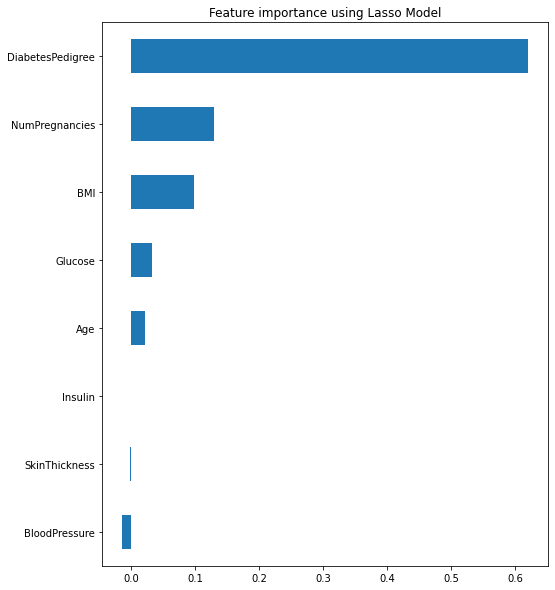

In [27]:
from sklearn.linear_model import LogisticRegression
 
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Best C using built-in LassoCV: %f" % clf.C)
print("Best score using built-in LassoCV: %f" %clf.score(X,y))
 
coef = pd.Series(clf.coef_[0], index = data.columns[0:8])
 
print("Logistic Regression picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
 
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


#Summary#
  Congratulations on completing this introduction to feature selection and feature engineering. This is just one (small) part of machine learning. 
  We also have only done a starting step for traditional machine learning. The new rage is 'Deep Learning'. There is not space to go into this here, but in most deep learning applications, there is no explicit feature selection--the computer learns which features are important. But feature engineering is still needed, and in some cases, feature selection will improve performance. 
  If you are interested in trying your hand at deep learning, and applying it to medical imaging, I have written a series of articles, known as 'Magicians Corner' in the Radiology: AI journal. Much like this notebook, all articles have an accompanying colab notebook so readers can actually run the code and experiement with it. Here is links to the  articles ( https://pubs.rsna.org/page/ai/magicians_corner ), which contain the links to the notebooks.
